## Die EMNIST Datenbank und Maschinelles Lernen

Dieses Notebook verwendet Code aus dem wundervollen Buch  "Deep learning mit Python und Keras" von *Francois Chollet*.

Für den EMNIST Datensatz verwenden wir:     "Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373

Siehe https://biometrics.nist.gov/cs_links/EMNIST/Readme.txt
    

Viel Spaß beim Ausprobieren dieser faszinierenden neuen Techniken!

In [5]:
# Da der link sich geändert hat, mussten wir das original emnist.py entsprechend
# anpassen ... 

# wir laden die Daten jetzt manuell
from tensorflow.keras.utils import get_file
from zipfile import ZipFile

local_path = "emnist_matlab.npz"

path = get_file(
        local_path, origin=("https://biometrics.nist.gov/cs_links/EMNIST/matlab.zip"), extract=False
    )

743907328/743900280 [==============================] - 234s 0us/step


In [9]:
import os
from scipy import io as sio
type="balanced"

with ZipFile(path, "r") as opened_zip:

    # Read file and temporarily store it
    file_name = f"./{type}.mat"
    f = open(file_name, "wb")
    f.write(opened_zip.read(f"matlab/emnist-{type}.mat"))
    f.close()

    # Load data from Matlab file.
    # Source: https://stackoverflow.com/a/53547262
    mat = sio.loadmat(file_name)
    data = mat["dataset"]
    input_train = data["train"][0, 0]["images"][0, 0]
    target_train = data["train"][0, 0]["labels"][0, 0].flatten()
    input_test = data["test"][0, 0]["images"][0, 0]
    target_test = data["test"][0, 0]["labels"][0, 0].flatten()

    # Remove data when loaded
    os.remove(file_name)

In [11]:
# Reshape input data
# Source: https://stackoverflow.com/a/53547262
input_train = input_train.reshape(
    (input_train.shape[0], 28, 28), order="F"
)
input_test = input_test.reshape(
    (input_test.shape[0], 28, 28), order="F"
 )

# now store in the local variables:
train_images_orig = input_train
train_labels_orig = target_train
test_images_orig = input_test
test_labels_orig = target_test


In [12]:
# Wie sieht der Datensatz denn aus?
print("shape of training images  :", train_images_orig.shape)
print("length of training labels :", len(train_labels_orig))
print("training labels           :", train_labels_orig)
print("\nand length of test data   :", len(test_labels_orig))

shape of training images  : (112800, 28, 28)
length of training labels : 112800
training labels           : [45 36 43 ... 23 31  8]

and length of test data   : 18800


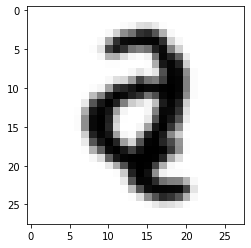

In [15]:
# Schauen wir uns doch einmal eine Zahl an ....
digit = train_images_orig[1] # number 1 is a ... a, probably :)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

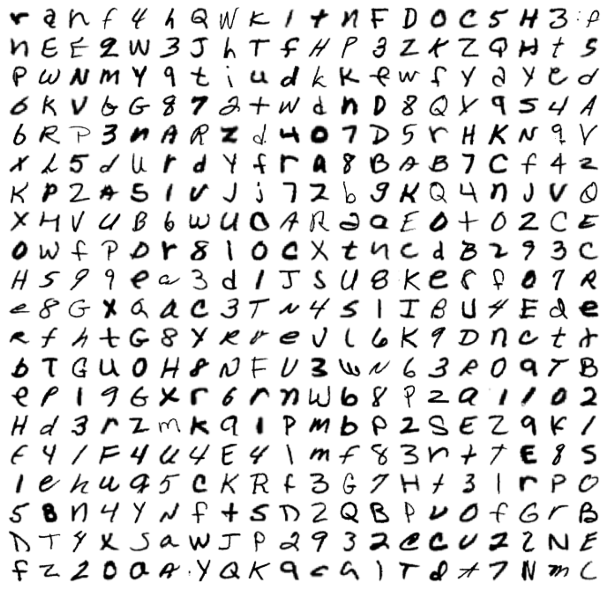

In [16]:
# Und nun die ersten Ziffern (von 60.000)
num_row = 20
num_col = 20
num = num_row*num_col

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
# plot images
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images_orig[i], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.subplots_adjust(bottom=0, right=0.4, top=0.2)
plt.show()

In [37]:
from keras import models
from keras import layers

# Wir spezifizieren das Netzwerk (es gibt auch noch viele andere Typen)
network = models.Sequential()

# Ein  layer mit 512 Neurons.
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(47, activation='softmax'))

# Nun spezifizieren wir die Optimierngsroutine. Wir nutzen RMSPROP
#
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Die neuronalen Netze die wir verwenden, werden am Besten mit Zahlen zwischen 0 und 1 gefüttert - wir müssen die Daten noch entsprechend skalieren.

Ziel ist es, ein Array der Größe [60000, 28*28] zu erhalten und die Werte  (zwischen  0...255) auf [0,1] zu Salieren, durch Division mit 255.

In [38]:
train_images = train_images_orig.reshape(112800, 28 * 28)
train_images = train_images.astype('float32') / 255

test_images = test_images_orig.reshape(18800, 28 * 28)
test_images = test_images.astype('float32') / 255

Neben den Bildern gibt es auch die tatsächlichen korrekten Werte - die "Labels". Auch sie müssen entsprechend formatiert werden.

In [39]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels_orig)
test_labels = to_categorical(test_labels_orig)

In [40]:
print(train_labels.shape)
print(test_labels.shape)

(112800, 47)
(18800, 47)


Nun sind wir in derLage das Netzwerk zu trainieren (zu fitten). Let's go!



In [43]:
# Training is fitting the network to data

history = network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
882/882 [==============================] - 11s 13ms/step - loss: 0.2990 - accuracy: 0.8936
Epoch 2/25
882/882 [==============================] - 11s 13ms/step - loss: 0.2838 - accuracy: 0.8982
Epoch 3/25
882/882 [==============================] - 12s 13ms/step - loss: 0.2708 - accuracy: 0.9020
Epoch 4/25
882/882 [==============================] - 11s 13ms/step - loss: 0.2579 - accuracy: 0.9068
Epoch 5/25
882/882 [==============================] - 11s 13ms/step - loss: 0.2479 - accuracy: 0.9101
Epoch 6/25
882/882 [==============================] - 12s 13ms/step - loss: 0.2377 - accuracy: 0.9122
Epoch 7/25
882/882 [==============================] - 12s 13ms/step - loss: 0.2278 - accuracy: 0.9159
Epoch 8/25
882/882 [==============================] - 11s 13ms/step - loss: 0.2189 - accuracy: 0.9187
Epoch 9/25
882/882 [==============================] - 12s 13ms/step - loss: 0.2104 - accuracy: 0.9216
Epoch 10/25
882/882 [==============================] - 12s 14ms/step - loss: 0.204

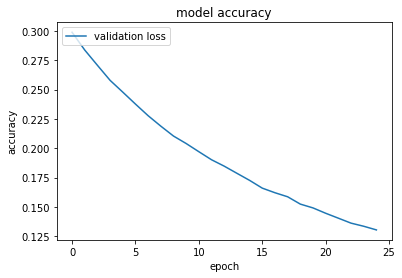

In [52]:
# plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation loss'], loc='upper left')
plt.show()

Super - das wars schon. Wir haben das Netzwerk trainiert. Sehr cool.

Was haben wir erreicht. Eine Genauigkeit in der Höhe von 95% auf den Trainingsdaten. Kann das verbessert werden? Aber klar - experimentieren Sie mit dem Netzwerk. Trainieren Sie länger. Was können Sie wohl erreichen (now its your turn).



Auf den Testdaten sind wir etwas schlechter.

In [53]:
# Now we plot all numbers wrongly classified

In [54]:
import numpy as np

# our prediction
prediction = network.predict(test_images)
print(' '.join('{:.4f}'.format(k) for k in prediction[0]))

# recall that test_labels is categorized
# so test_labels[0] is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# the actual label is also (!) the argmax
print('\n Decision: ',np.argmax(prediction[0]),'\n Label:',np.argmax(test_labels[0]))

0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0062 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.9937 0.0000 0.0000 0.0000 0.0000 0.0000

 Decision:  41 
 Label: 41


In [58]:
wrong_ones = list()
for i in range(len(test_labels)):
  if (np.argmax(prediction[i]) != np.argmax(test_labels[i])):
     #print(i, ' '.join('{:.2f}'.format(k) for k in (prediction[i]-test_labels[i]) ) )
     wrong_ones.append(i)
print("Wrong ones: ",
    len(wrong_ones), " from : ", len(test_labels), "i.e. ", len(wrong_ones)/ len(test_labels))

Wrong ones:  3261  from :  18800 i.e.  0.17345744680851063


In [56]:
wrong_ones


[9,
 12,
 18,
 25,
 29,
 41,
 50,
 51,
 52,
 56,
 63,
 73,
 97,
 100,
 105,
 119,
 120,
 125,
 153,
 154,
 162,
 168,
 169,
 170,
 171,
 172,
 184,
 194,
 196,
 207,
 210,
 219,
 238,
 240,
 241,
 242,
 244,
 246,
 248,
 267,
 283,
 284,
 285,
 287,
 291,
 295,
 299,
 303,
 307,
 312,
 330,
 332,
 334,
 335,
 345,
 348,
 355,
 360,
 363,
 367,
 370,
 371,
 394,
 395,
 398,
 407,
 414,
 432,
 433,
 435,
 441,
 444,
 455,
 457,
 458,
 467,
 482,
 485,
 491,
 496,
 516,
 519,
 520,
 523,
 526,
 531,
 533,
 537,
 540,
 542,
 545,
 553,
 554,
 557,
 569,
 575,
 592,
 604,
 608,
 615,
 617,
 618,
 638,
 646,
 648,
 649,
 654,
 657,
 663,
 674,
 677,
 680,
 681,
 696,
 701,
 711,
 713,
 719,
 727,
 729,
 739,
 744,
 747,
 760,
 775,
 776,
 784,
 787,
 789,
 792,
 793,
 799,
 801,
 802,
 806,
 813,
 817,
 839,
 857,
 863,
 865,
 877,
 879,
 880,
 910,
 911,
 918,
 919,
 922,
 930,
 933,
 936,
 940,
 965,
 969,
 970,
 980,
 983,
 987,
 988,
 994,
 996,
 1001,
 1003,
 1005,
 1015,
 1016,
 1020,


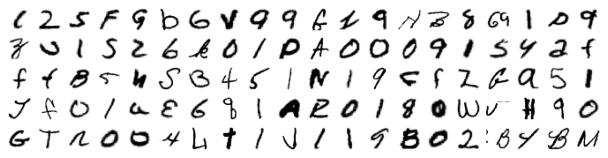

In [63]:
import math

# We plot all wrongly classified images
# Obtain an impression of the first images
num_col = 20
num = len(wrong_ones)
num = 100 # we plot only the first 100
num_row = math.ceil(num/num_col) # round up to the next integer

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
# plot images
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images_orig[wrong_ones[i]], cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.subplots_adjust(bottom=0, right=0.4, top=0.2)
plt.show()

# Very clear that this can be improved !

In [ ]:
# now we try an ensemble filter approach

num_models = 20

list_of_models = list()
for i in range(num_models):
  # feedforward neural network
  network = models.Sequential()

  # a Dense layer with 512 neurons.
  network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
  network.add(layers.Dense(47, activation='softmax'))

  # now we specify the optimizer and the loss function.
  # metrics give the values which are monitored during the training
  network.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
  network.fit(train_images, train_labels, epochs=25, batch_size=128)
  list_of_models.append(network)

Epoch 1/25
882/882 [==============================] - 12s 13ms/step - loss: 1.0213 - accuracy: 0.7047
Epoch 2/25
882/882 [==============================] - 12s 13ms/step - loss: 0.5814 - accuracy: 0.8160
Epoch 3/25
882/882 [==============================] - 10s 12ms/step - loss: 0.4801 - accuracy: 0.8420
Epoch 4/25
882/882 [==============================] - 10s 12ms/step - loss: 0.4269 - accuracy: 0.8560
Epoch 5/25
882/882 [==============================] - 10s 12ms/step - loss: 0.3923 - accuracy: 0.8681
Epoch 6/25
882/882 [==============================] - 11s 12ms/step - loss: 0.3639 - accuracy: 0.8743
Epoch 7/25
882/882 [==============================] - 10s 12ms/step - loss: 0.3419 - accuracy: 0.8813
Epoch 8/25
882/882 [==============================] - 10s 12ms/step - loss: 0.3221 - accuracy: 0.8865
Epoch 9/25
882/882 [==============================] - 11s 12ms/step - loss: 0.3038 - accuracy: 0.8916
Epoch 10/25
882/882 [==============================] - 12s 13ms/step - loss: 0.289

In [ ]:
# now we take the predictor with the highest probability
list_of_predictions = list()
for model in list_of_models:
  list_of_predictions.append(model.predict(test_images) )

In [ ]:
# We do the comparison by summing the probabilities of each model
# and adding them up. The ensemble prediction is again given by those entry
# which has the hightest value.

lop = np.array (list_of_predictions)
summed = np.sum(lop[0:num_models,:,], axis=0)
ensemble_prediction = np.argmax(summed, axis=1)
test_labels_argmax = np.argmax(test_labels, axis=1)


In [ ]:
print("Achieved accuracy of the ensemble",
      np.sum( ensemble_prediction==np.array(test_labels_argmax) ) / len(test_labels_argmax)
     )

Achieved accuracy of the ensemble 0.9834


### The ensemble is a bit better than single networks:

Summarizing, we increased from 9801 to 9836 correctly classified images. The ensemble classifies 35 images better in comparison to a single network. Increasing the ensemble size does not improve the results significantly, thus showing that this is the limit of these type of network

In [ ]:
# now we try a larger ensemble.

num_models = 40

list_of_models = list()
for i in range(num_models):
  # feedforward neural network
  network = models.Sequential()

  # a Dense layer with 512 neurons.
  network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
  network.add(layers.Dense(10, activation='softmax'))

  # now we specify the optimizer and the loss function.
  # metrics give the values which are monitored during the training
  network.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
  network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose = 0)
  list_of_models.append(network)

# now we take the predictor with the highest probability
list_of_predictions = list()
for model in list_of_models:
  list_of_predictions.append(model.predict(test_images) )

# We do the comparison by summing the probabilities of each model
# and adding them up. The ensemble prediction is again given by those entry
# which has the hightest value.

lop = np.array (list_of_predictions)
summed = np.sum(lop[0:num_models,:,], axis=0)
ensemble_prediction = np.argmax(summed, axis=1)
test_labels_argmax = np.argmax(test_labels, axis=1)

print("Achieved accuracy of the ensemble",
      np.sum( ensemble_prediction==np.array(test_labels_argmax) ) / len(test_labels_argmax)
     )

import beepy
beepy.beep(sound=3)

Achieved accuracy of the ensemble 0.9838


In [ ]:
# now we try a smaller ensemble.

num_models = 5

list_of_models = list()
for i in range(num_models):
  # feedforward neural network
  network = models.Sequential()

  # a Dense layer with 512 neurons.
  network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
  network.add(layers.Dense(10, activation='softmax'))

  # now we specify the optimizer and the loss function.
  # metrics give the values which are monitored during the training
  network.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
  network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose = 0)
  list_of_models.append(network)

# now we take the predictor with the highest probability
list_of_predictions = list()
for model in list_of_models:
  list_of_predictions.append(model.predict(test_images) )

# We do the comparison by summing the probabilities of each model
# and adding them up. The ensemble prediction is again given by those entry
# which has the hightest value.

lop = np.array (list_of_predictions)
summed = np.sum(lop[0:num_models,:,], axis=0)
ensemble_prediction = np.argmax(summed, axis=1)
test_labels_argmax = np.argmax(test_labels, axis=1)

print("Achieved accuracy of the ensemble",
      np.sum( ensemble_prediction==np.array(test_labels_argmax) ) / len(test_labels_argmax)
     )

Achieved accuracy of the ensemble 0.9823
